In [ ]:
import pandas as pd
import numpy as np

features = pd.read_csv('features.txt', delim_whitespace=True, header=None)
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features[1].values


<ipython-input-3-94b6223264ee>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('features.txt', delim_whitespace=True, header=None)
<ipython-input-3-94b6223264ee>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None)


In [ ]:
print("Feature Names:")
print(X_train.columns)


Feature Names:
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


In [ ]:
print("\nFirst few rows of the training data:")
print(X_train.head())


First few rows of the training data:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-

In [ ]:
missing_values = X_train.isnull().sum().sum()
print("Total missing values in the dataset:", missing_values)


Total missing values in the dataset: 0


In [ ]:
duplicate_rows = X_train.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)

print("Shape of scaled data:", X_scaled_df.shape)
print(X_scaled_df.head())


Shape of scaled data: (7352, 562)
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.200642          -0.063683          -0.419628         -0.868814   
1           0.055948           0.031486          -0.253908         -0.875426   
2           0.073515          -0.043416          -0.076295         -0.869039   
3           0.066696          -0.208422          -0.249712         -0.870626   
4           0.030469           0.027587          -0.109848         -0.875188   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.939441         -0.737529         -0.859817         -0.939019   
1         -0.923902         -0.849304         -0.868531         -0.921998   
2         -0.907760         -0.893785         -0.863137         -0.898854   
3         -0.940022         -0.921805         -0.864503         -0.938124   
4         -0.934878         -0.921343         -0.867384         -0.931789   

   tBodyAcc-mad()-Z  t

In [ ]:
from sklearn.cluster import KMeans

k=5

kmeans=KMeans(n_clusters=k,random_state=42)
cluster_labels=kmeans.fit_predict(X_scaled_df)

X_train['Cluster'] = cluster_labels

print(X_train.head())
print(X_train['Cluster'].value_counts())


   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

<ipython-input-90-dce12bfc5b52>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(label / k), label=f'Cluster {label}')


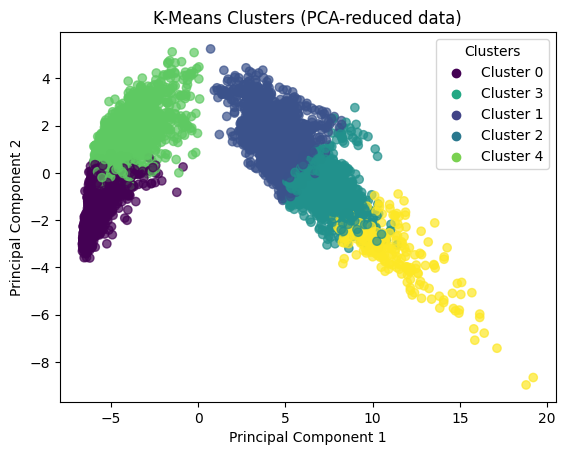

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train.drop(columns='Cluster'))

plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_train['Cluster'], cmap='viridis', alpha=0.7)

cluster_labels = X_train['Cluster'].unique()
for label in cluster_labels:
    plt.scatter([], [], c=plt.cm.viridis(label / k), label=f'Cluster {label}')

plt.title("K-Means Clusters (PCA-reduced data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")
plt.show()


<ipython-input-112-d37a44ba73c5>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(label / k), label=f'Cluster {label}')
<ipython-input-112-d37a44ba73c5>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(label / k), label=f'Cluster {label}')


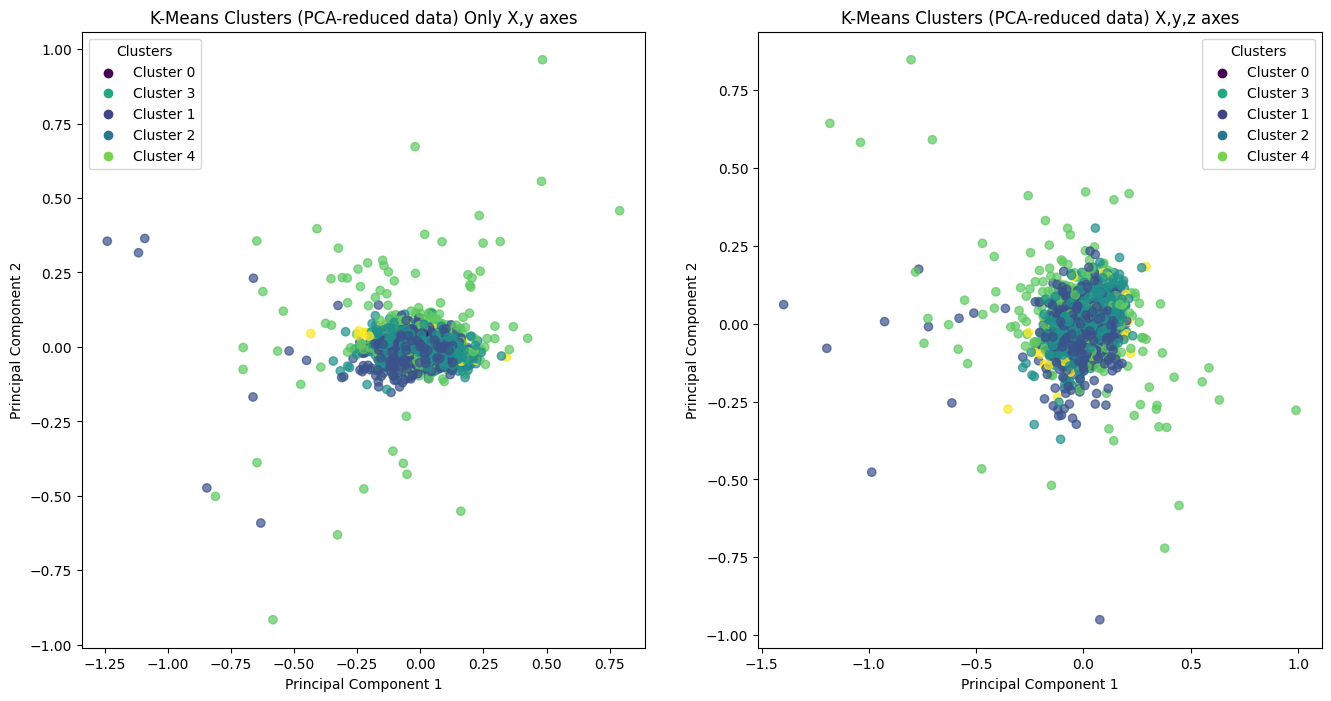

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_acc=X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y']]
X_acc_3=X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_acc)
X_pca3 = pca.fit_transform(X_acc_3)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_train['Cluster'], cmap='viridis', alpha=0.7)
cluster_labels = X_train['Cluster'].unique()
for label in cluster_labels:
    plt.scatter([], [], c=plt.cm.viridis(label / k), label=f'Cluster {label}')
plt.title("K-Means Clusters (PCA-reduced data) Only X,y axes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=X_train['Cluster'], cmap='viridis', alpha=0.7)
cluster_labels = X_train['Cluster'].unique()
for label in cluster_labels:
    plt.scatter([], [], c=plt.cm.viridis(label / k), label=f'Cluster {label}')
plt.title("K-Means Clusters (PCA-reduced data) X,y,z axes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")
plt.show()


Used chatgpt to generate below to implement the code

Intution-> First we picked the acc values(X,Y,Z) and ploted those values and displayed to which cluster they belonged to then we addded gryoscope values and view how it influcened the graph

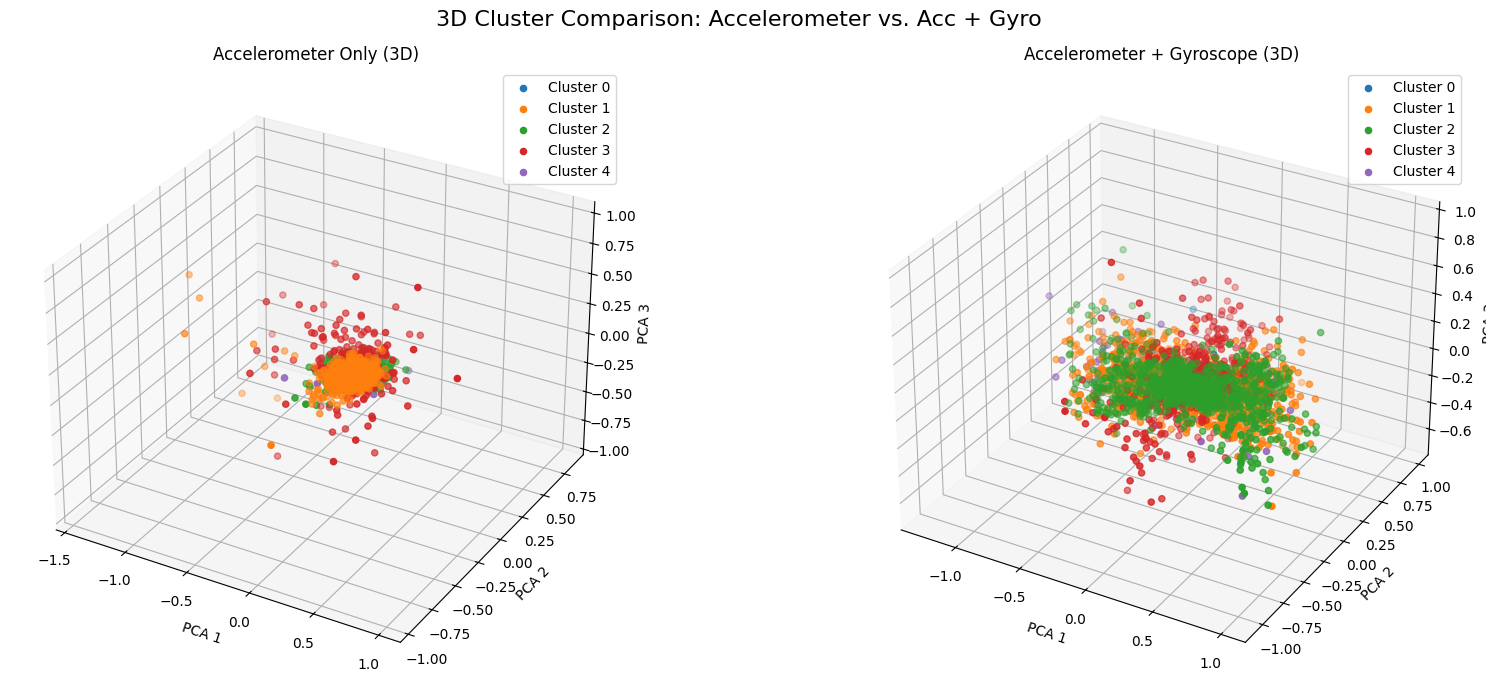

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.decomposition import PCA

# 1. Features
acc_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
gyro_features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']
combined_features = acc_features + gyro_features

# 2. Apply PCA (3 components for 3D)
pca_acc = PCA(n_components=3)
acc_pca = pca_acc.fit_transform(X_train[acc_features])

pca_comb = PCA(n_components=3)
comb_pca = pca_comb.fit_transform(X_train[combined_features])

# 3. Set up 3D plots
fig = plt.figure(figsize=(18, 7))

# First plot (Accelerometer only)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
for label in sorted(X_train['Cluster'].unique()):
    idx = X_train['Cluster'] == label
    ax1.scatter(acc_pca[idx, 0], acc_pca[idx, 1], acc_pca[idx, 2], label=f'Cluster {label}')
ax1.set_title('Accelerometer Only (3D)')
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_zlabel('PCA 3')
ax1.legend()
ax1.grid(True)

# Second plot (Accelerometer + Gyroscope)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for label in sorted(X_train['Cluster'].unique()):
    idx = X_train['Cluster'] == label
    ax2.scatter(comb_pca[idx, 0], comb_pca[idx, 1], comb_pca[idx, 2], label=f'Cluster {label}')
ax2.set_title('Accelerometer + Gyroscope (3D)')
ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_zlabel('PCA 3')
ax2.legend()
ax2.grid(True)

plt.suptitle('3D Cluster Comparison: Accelerometer vs. Acc + Gyro', fontsize=16)
plt.tight_layout()
plt.show()
